# ECDC COVID-19 Dataset Analysis

# INTRODUCTION

### The COVID-19 pandemic, caused by the SARS-CoV-2 virus, has resulted in an unprecedented global health crisis.
### Governments, public health institutions, and researchers have been gathering massive datasets to track the spread of the virus. One such dataset is the ECDC COVID-19 dataset from Kaggle, which provides a comprehensive overview of confirmed cases and deaths from various countries across different dates.

### This dataset includes daily records of confirmed cases and deaths reported globally, along with key geographical identifiers. By analyzing this dataset, we can derive insights about the spread of COVID-19 across different countries and territories, the severity of outbreaks, and possible trends or correlations.

# OBJECTIVE

### The goal of this project is to:

### * Analyze the daily trends of COVID-19 cases and deaths.
### *Explore variations in cases and deaths across different countries and regions.

## ECDC_COVID_19:DATASET DESCRIPTION

* dateRep: The date of the reported data

* day: The day of the report (integer, e.g., 1-31).

* month: The month of the report (integer, e.g., 1-12).

* year: The year of the report (integer, e.g., 2020).

* cases: The number of new confirmed cases reported on this date.

* deaths: The number of new deaths reported on this date.

* countriesAndTerritories: The name of the country or territory to which the data belongs.

* geoId: A short geographical identifier (code) for the country or territory.

* countryterritoryCode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("ECDC_COVID_19.csv")

In [3]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
1,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9508,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9509,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9510,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9511,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9513 entries, 0 to 9512
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  9513 non-null   object 
 1   day                      9513 non-null   int64  
 2   month                    9513 non-null   int64  
 3   year                     9513 non-null   int64  
 4   cases                    9513 non-null   int64  
 5   deaths                   9513 non-null   int64  
 6   countriesAndTerritories  9513 non-null   object 
 7   geoId                    9488 non-null   object 
 8   countryterritoryCode     9324 non-null   object 
 9   popData2018              9370 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 743.3+ KB


In [5]:
df['dateRep']=pd.to_datetime(df['dateRep'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9513 entries, 0 to 9512
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  9513 non-null   datetime64[ns]
 1   day                      9513 non-null   int64         
 2   month                    9513 non-null   int64         
 3   year                     9513 non-null   int64         
 4   cases                    9513 non-null   int64         
 5   deaths                   9513 non-null   int64         
 6   countriesAndTerritories  9513 non-null   object        
 7   geoId                    9488 non-null   object        
 8   countryterritoryCode     9324 non-null   object        
 9   popData2018              9370 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 743.3+ KB


### There are null values in 3 columns
* geoId                       25
* countryterritoryCode       189
* popData2018                143

In [7]:
df.isna().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       25
countryterritoryCode       189
popData2018                143
dtype: int64

### fill null values in the column popData2018 using medium()

In [8]:
df['popData2018'].fillna(df['popData2018'].median(),inplace=True)

### checking the null values  and filling them in the geoId column

In [9]:
nullvalues_in_geoId=df[df['geoId'].isna()].reset_index(drop=True)
nullvalues_in_geoId

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-08,8,4,2020,0,0,Namibia,NaN,NAM,2448255.0
1,2020-04-07,7,4,2020,0,0,Namibia,NaN,NAM,2448255.0
2,2020-04-06,6,4,2020,2,0,Namibia,NaN,NAM,2448255.0
3,2020-04-05,5,4,2020,0,0,Namibia,NaN,NAM,2448255.0
4,2020-04-04,4,4,2020,1,0,Namibia,NaN,NAM,2448255.0
5,2020-04-03,3,4,2020,0,0,Namibia,NaN,NAM,2448255.0
6,2020-04-02,2,4,2020,2,0,Namibia,NaN,NAM,2448255.0
7,2020-04-01,1,4,2020,0,0,Namibia,NaN,NAM,2448255.0
8,2020-03-31,31,3,2020,0,0,Namibia,NaN,NAM,2448255.0
9,2020-03-30,30,3,2020,3,0,Namibia,NaN,NAM,2448255.0


In [10]:
geoid_namibia=df[['geoId','countryterritoryCode']][df['countriesAndTerritories']=='Namibia']
geoid_namibia

,geoId,countryterritoryCode
6047,NaN,NAM
6048,NaN,NAM
6049,NaN,NAM
6050,NaN,NAM
6051,NaN,NAM
6052,NaN,NAM
6053,NaN,NAM
6054,NaN,NAM
6055,NaN,NAM
6056,NaN,NAM


In [11]:
df['geoId'].fillna('NA', inplace=True)

### checking the null values and filling them in the countryterritoryCode

In [12]:
null_countryterritoryCode=df[df['countryterritoryCode'].isna().reset_index(drop=True)]
null_countryterritoryCode

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
260,2020-04-08,8,4,2020,0,0,Anguilla,AI,NaN,10627165.0
261,2020-04-07,7,4,2020,0,0,Anguilla,AI,NaN,10627165.0
262,2020-04-06,6,4,2020,0,0,Anguilla,AI,NaN,10627165.0
263,2020-04-05,5,4,2020,0,0,Anguilla,AI,NaN,10627165.0
264,2020-04-04,4,4,2020,0,0,Anguilla,AI,NaN,10627165.0
...,...,...,...,...,...,...,...,...,...,...
2979,2020-04-08,8,4,2020,3,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2980,2020-04-07,7,4,2020,0,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2981,2020-04-06,6,4,2020,1,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2982,2020-04-05,5,4,2020,0,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0


In [13]:
null_countryterritoryCode['countriesAndTerritories'].unique()

array(['Anguilla', 'Bonaire, Saint Eustatius and Saba',
       'Cases_on_an_international_conveyance_Japan', 'Czechia',
       'Falkland_Islands_(Malvinas)'], dtype=object)

In [14]:
anguilla=df['countryterritoryCode'][df['countriesAndTerritories']=='Anguilla']
anguilla

260    NaN
261    NaN
262    NaN
263    NaN
264    NaN
265    NaN
266    NaN
267    NaN
268    NaN
269    NaN
270    NaN
271    NaN
272    NaN
Name: countryterritoryCode, dtype: object

In [15]:
df.loc[260:272].fillna('AIA',inplace=True)


In [16]:
df[df['countriesAndTerritories']=='Anguilla']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
260,2020-04-08,8,4,2020,0,0,Anguilla,AI,AIA,10627165.0
261,2020-04-07,7,4,2020,0,0,Anguilla,AI,AIA,10627165.0
262,2020-04-06,6,4,2020,0,0,Anguilla,AI,AIA,10627165.0
263,2020-04-05,5,4,2020,0,0,Anguilla,AI,AIA,10627165.0
264,2020-04-04,4,4,2020,0,0,Anguilla,AI,AIA,10627165.0
265,2020-04-03,3,4,2020,1,0,Anguilla,AI,AIA,10627165.0
266,2020-04-02,2,4,2020,0,0,Anguilla,AI,AIA,10627165.0
267,2020-04-01,1,4,2020,0,0,Anguilla,AI,AIA,10627165.0
268,2020-03-31,31,3,2020,0,0,Anguilla,AI,AIA,10627165.0
269,2020-03-30,30,3,2020,0,0,Anguilla,AI,AIA,10627165.0


In [17]:
df.isna().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                        0
countryterritoryCode       176
popData2018                  0
dtype: int64

In [18]:
BSES=df['countryterritoryCode'][df['countriesAndTerritories']=='Bonaire, Saint Eustatius and Saba']
BSES

1199    NaN
1200    NaN
1201    NaN
1202    NaN
1203    NaN
1204    NaN
1205    NaN
Name: countryterritoryCode, dtype: object

In [19]:
df.loc[1199:1205].fillna('BES',inplace=True)
BSES=df['countryterritoryCode'][df['countriesAndTerritories']=='Bonaire, Saint Eustatius and Saba']
BSES

1199    BES
1200    BES
1201    BES
1202    BES
1203    BES
1204    BES
1205    BES
Name: countryterritoryCode, dtype: object

In [20]:
df.isna().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                        0
countryterritoryCode       169
popData2018                  0
dtype: int64

In [21]:
CICJ=df['countryterritoryCode'][df['countriesAndTerritories']=='Cases_on_an_international_conveyance_Japan']
CICJ

1682    NaN
1683    NaN
1684    NaN
1685    NaN
1686    NaN
       ... 
1741    NaN
1742    NaN
1743    NaN
1744    NaN
1745    NaN
Name: countryterritoryCode, Length: 64, dtype: object

In [22]:
CICJ=df['countryterritoryCode'][df['countriesAndTerritories']=='Cases_on_an_international_conveyance_Japan'].unique()

In [23]:
df.loc[1682:1745].fillna('IC Japan',inplace=True)

In [24]:
df[df['countriesAndTerritories']=='Cases_on_an_international_conveyance_Japan']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
1682,2020-03-10,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
1683,2020-03-02,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
1684,2020-03-01,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
1685,2020-02-29,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
1686,2020-02-28,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
...,...,...,...,...,...,...,...,...,...,...
1741,2020-01-04,4,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
1742,2020-01-03,3,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
1743,2020-01-02,2,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0
1744,2020-01-01,1,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,IC Japan,3000.0


In [25]:
df[df['countriesAndTerritories']=='Czechia']


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
2222,2020-04-08,8,4,2020,195,10,Czechia,CZ,NaN,10627165.0
2223,2020-04-07,7,4,2020,235,11,Czechia,CZ,NaN,10627165.0
2224,2020-04-06,6,4,2020,115,8,Czechia,CZ,NaN,10627165.0
2225,2020-04-05,5,4,2020,282,6,Czechia,CZ,NaN,10627165.0
2226,2020-04-04,4,4,2020,332,9,Czechia,CZ,NaN,10627165.0
...,...,...,...,...,...,...,...,...,...,...
2317,2020-01-04,4,1,2020,0,0,Czechia,CZ,NaN,10627165.0
2318,2020-01-03,3,1,2020,0,0,Czechia,CZ,NaN,10627165.0
2319,2020-01-02,2,1,2020,0,0,Czechia,CZ,NaN,10627165.0
2320,2020-01-01,1,1,2020,0,0,Czechia,CZ,NaN,10627165.0


In [26]:
df.loc[2222:2321].fillna('CZE',inplace=True)
df[df['countriesAndTerritories']=='Czechia']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
2222,2020-04-08,8,4,2020,195,10,Czechia,CZ,CZE,10627165.0
2223,2020-04-07,7,4,2020,235,11,Czechia,CZ,CZE,10627165.0
2224,2020-04-06,6,4,2020,115,8,Czechia,CZ,CZE,10627165.0
2225,2020-04-05,5,4,2020,282,6,Czechia,CZ,CZE,10627165.0
2226,2020-04-04,4,4,2020,332,9,Czechia,CZ,CZE,10627165.0
...,...,...,...,...,...,...,...,...,...,...
2317,2020-01-04,4,1,2020,0,0,Czechia,CZ,CZE,10627165.0
2318,2020-01-03,3,1,2020,0,0,Czechia,CZ,CZE,10627165.0
2319,2020-01-02,2,1,2020,0,0,Czechia,CZ,CZE,10627165.0
2320,2020-01-01,1,1,2020,0,0,Czechia,CZ,CZE,10627165.0


In [27]:
FIM=df['countryterritoryCode'][df['countriesAndTerritories']=='Falkland_Islands_(Malvinas)']
FIM

2979    NaN
2980    NaN
2981    NaN
2982    NaN
2983    NaN
Name: countryterritoryCode, dtype: object

In [28]:
df.loc[2979:2983].fillna('FLK',inplace=True)
df[df['countriesAndTerritories']=='Falkland_Islands_(Malvinas)']


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
2979,2020-04-08,8,4,2020,3,0,Falkland_Islands_(Malvinas),FK,FLK,10627165.0
2980,2020-04-07,7,4,2020,0,0,Falkland_Islands_(Malvinas),FK,FLK,10627165.0
2981,2020-04-06,6,4,2020,1,0,Falkland_Islands_(Malvinas),FK,FLK,10627165.0
2982,2020-04-05,5,4,2020,0,0,Falkland_Islands_(Malvinas),FK,FLK,10627165.0
2983,2020-04-04,4,4,2020,1,0,Falkland_Islands_(Malvinas),FK,FLK,10627165.0


In [29]:
df.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2018                0
dtype: int64

### Extracting day and month names

In [30]:
# Convert 'dateRep' column to datetime format
df['dateRep']=pd.to_datetime(df['dateRep'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9513 entries, 0 to 9512
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  9513 non-null   datetime64[ns]
 1   day                      9513 non-null   int64         
 2   month                    9513 non-null   int64         
 3   year                     9513 non-null   int64         
 4   cases                    9513 non-null   int64         
 5   deaths                   9513 non-null   int64         
 6   countriesAndTerritories  9513 non-null   object        
 7   geoId                    9513 non-null   object        
 8   countryterritoryCode     9513 non-null   object        
 9   popData2018              9513 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 743.3+ KB


In [31]:
df['day_name']=df['dateRep'].dt.day_name()

In [32]:
df['month_name']=df['dateRep'].dt.month_name()

In [33]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,day_name,month_name
0,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0,Wednesday,April
1,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0,Tuesday,April
2,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,Monday,April
3,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,Sunday,April
4,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,Saturday,April
...,...,...,...,...,...,...,...,...,...,...,...,...
9508,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Wednesday,March
9509,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Tuesday,March
9510,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Monday,March
9511,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Sunday,March


# TOTAL CASES AND DEATHS OVER TIME

In [34]:
trend = df.groupby('dateRep').sum()[['cases', 'deaths']].reset_index()
trend

,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
95,2020-04-04,81714,6586
96,2020-04-05,86713,6115
97,2020-04-06,71232,4655
98,2020-04-07,71392,5137


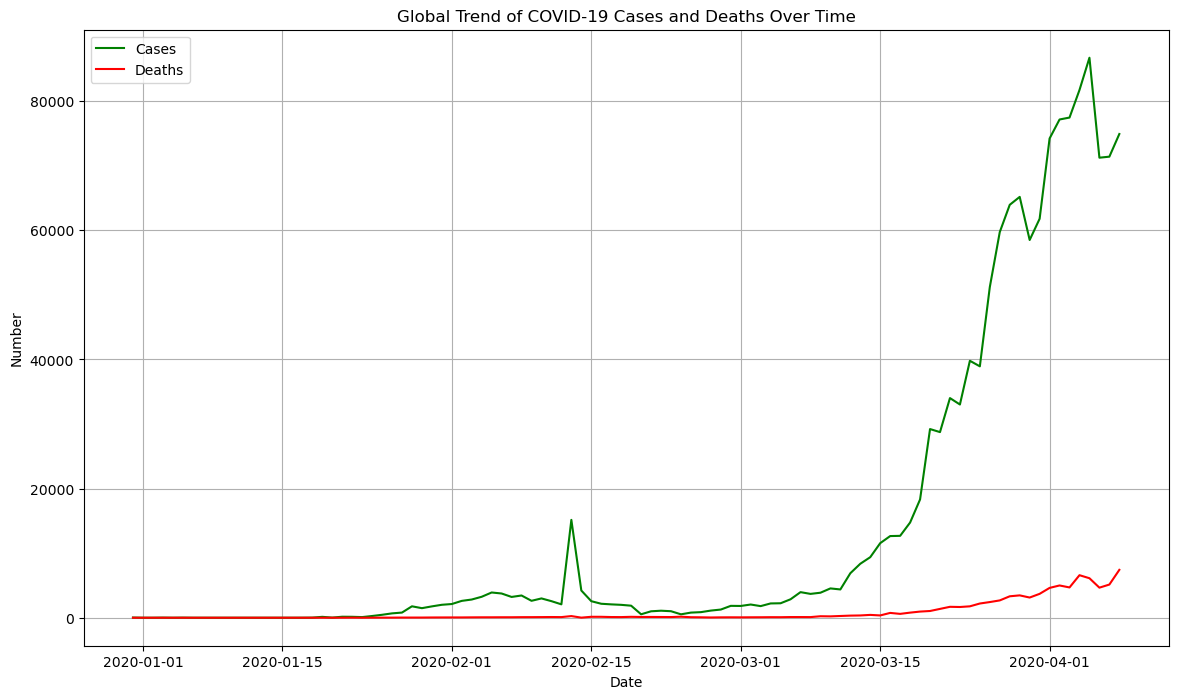

In [35]:
plt.figure(figsize=(14, 8))

plt.title('Global Trend of COVID-19 Cases and Deaths Over Time')

plt.plot(trend['dateRep'], trend['cases'], label='Cases', color='green')
plt.plot(trend['dateRep'], trend['deaths'], label='Deaths', color='red')

plt.xlabel('Date')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.show()

* Cases Rising Fast: COVID-19 cases increased rapidly from January to April 2020.
* Deaths Increasing: Deaths also rose, but not as quickly as cases.
* Comparison: The graph shows the difference in the rate of increase between cases and deaths.

# TOP 10 COUNTRIES WITH THE HIGHEST AND LOWEST REPORTED COVID-19 CASES

In [36]:
country_cases = df.groupby('countriesAndTerritories')["cases"].sum().reset_index()
country_cases

,countriesAndTerritories,cases
0,Afghanistan,367
1,Albania,383
2,Algeria,1468
3,Andorra,545
4,Angola,17
...,...,...
199,Uzbekistan,504
200,Venezuela,166
201,Vietnam,251
202,Zambia,39


In [37]:
top10_countries_cases = country_cases.sort_values('cases', ascending=False).head(10)
top10_countries_cases

,countriesAndTerritories,cases
197,United_States_of_America,398809
176,Spain,140510
98,Italy,135586
74,Germany,103228
42,China,82784
69,France,78167
93,Iran,62589
194,United_Kingdom,55242
189,Turkey,34109
18,Belgium,22194


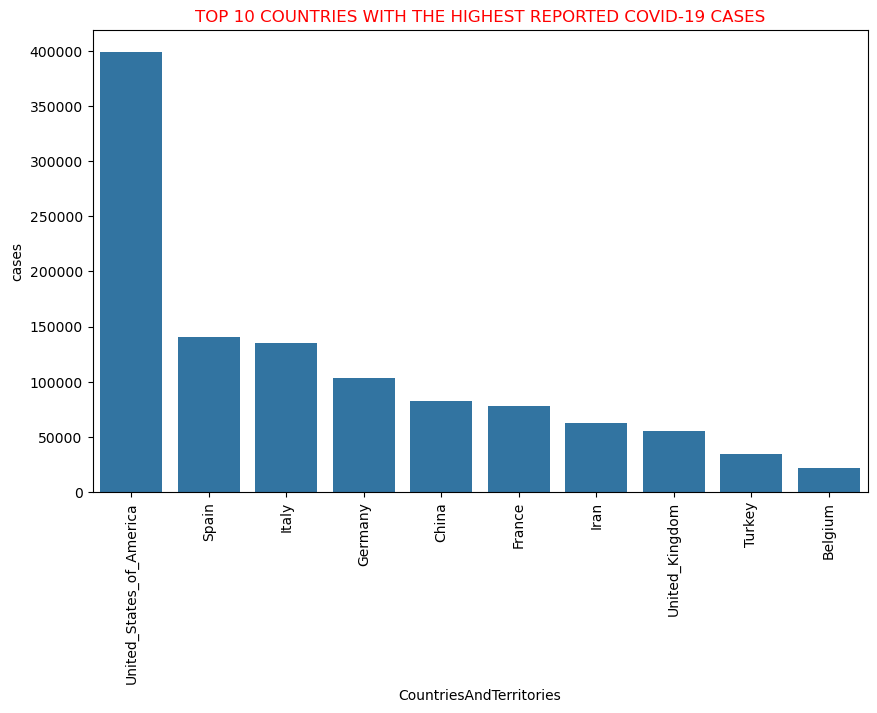

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='countriesAndTerritories', y='cases',data=top10_countries_cases)
plt.xlabel("CountriesAndTerritories")
plt.ylabel("cases")
plt.title('TOP 10 COUNTRIES WITH THE HIGHEST REPORTED COVID-19 CASES',color="red")
plt.xticks(rotation=90)
plt.show()

* United States of America has the highest number of reported cases by a large margin, significantly surpassing the other countries with over 400,000 cases.
* Spain and Italy follow next, with both countries having reported cases in the range of 150,000 to 200,000.
* Germany, China, and France form a middle cluster, each with reported cases around 100,000 to 150,000.
* Iran, United Kingdom, Turkey, and Belgium have relatively fewer cases compared to the top 3, with Belgium having the lowest among these top 10 countries.

In [39]:
least10_countries_cases = country_cases.sort_values('cases', ascending=False).tail(10)
least10_countries_cases

,countriesAndTerritories,cases
22,Bhutan,5
65,Falkland_Islands_(Malvinas),5
72,Gambia,4
32,Burundi,3
28,British_Virgin_Islands,3
5,Anguilla,3
24,"Bonaire, Saint Eustatius and Saba",2
148,Papua_New_Guinea,2
175,South_Sudan,1
185,Timor_Leste,1


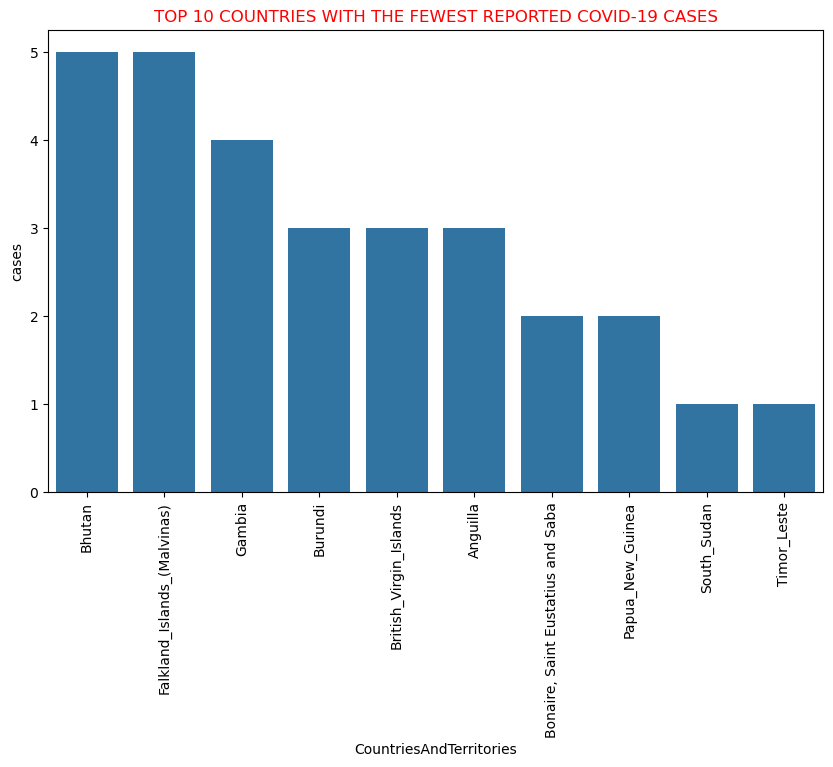

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='countriesAndTerritories', y='cases',data=least10_countries_cases)
plt.xlabel("CountriesAndTerritories")
plt.ylabel("cases")
plt.title('TOP 10 COUNTRIES WITH THE FEWEST REPORTED COVID-19 CASES',color="red")
plt.xticks(rotation=90)
plt.show()

* Bhutan and the Falkland Islands (Malvinas) have the highest number of cases among this group, with 5 reported cases each.
* Gambia and Burundi follow, with 4 reported cases each.
* British Virgin Islands, Anguilla, and Bonaire, Saint Eustatius, and Saba report 3 cases each, indicating a slightly lower number.
* Papua New Guinea, South Sudan, and Timor-Leste round out the list with the fewest cases, ranging from 2 to 1

# MONTH-WISE COVID-19 CASES AND DEATHS

In [41]:
monthly_summary = df.groupby('month_name')[['cases', 'deaths']].sum().reset_index()
monthly_summary

,month_name,cases,deaths
0,April,614757,44206
1,December,27,0
2,February,75377,2708
3,January,9799,213
4,March,691930,34351


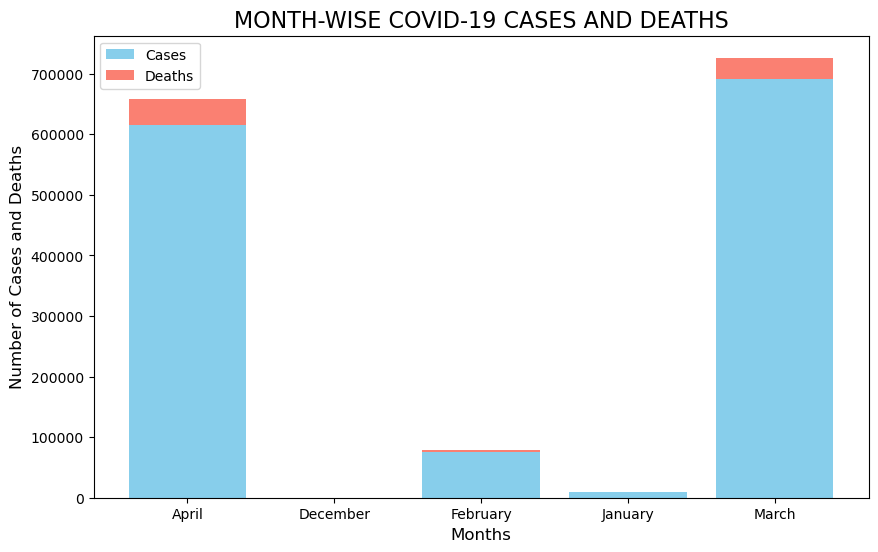

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_summary['month_name'], monthly_summary['cases'], label='Cases', color='skyblue')
plt.bar(monthly_summary['month_name'], monthly_summary['deaths'], bottom=monthly_summary['cases'], label='Deaths', color='salmon')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Number of Cases and Deaths', fontsize=12)
plt.title('MONTH-WISE COVID-19 CASES AND DEATHS', fontsize=16)
plt.xticks(monthly_summary['month_name'])
plt.legend()
plt.show()

* COVID-19 cases and deaths peaked in April and March, with a significant drop observed in December, January, and February.

# DAY-WISE COVID-19 CASES AND DEATHS

In [43]:
day_summary = df.groupby('day_name')[['cases', 'deaths']].sum().reset_index()
day_summary

,day_name,cases,deaths
0,Friday,189574,9179
1,Monday,190515,10922
2,Saturday,199244,12279
3,Sunday,212168,12172
4,Thursday,178186,9297
5,Tuesday,202507,11854
6,Wednesday,219696,15775


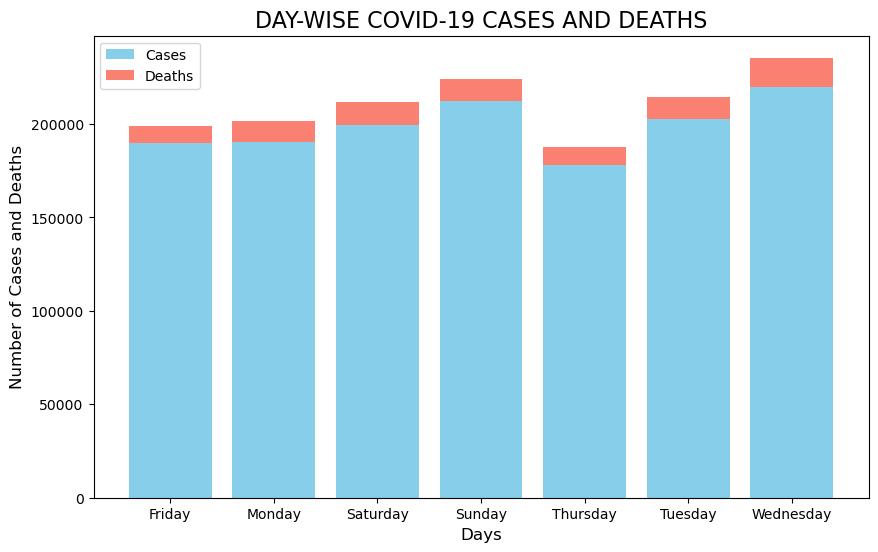

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(day_summary['day_name'], day_summary['cases'], label='Cases', color='skyblue')
plt.bar(day_summary['day_name'], day_summary['deaths'], bottom=day_summary['cases'], label='Deaths', color='salmon')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Cases and Deaths', fontsize=12)
plt.title('DAY-WISE COVID-19 CASES AND DEATHS', fontsize=16)
plt.xticks(day_summary['day_name'])
plt.legend()
plt.show()

# Suggestions 

* Strengthen Health Systems: Countries with consistently high cases need better healthcare infrastructure to manage ongoing cases and possible future waves.
* Prepare for Surges: Countries that showed rapid spikes in cases should have systems in place for early detection and rapid response to control outbreaks.
* Localized Policies: Countries with high death rates relative to cases may benefit from targeted health interventions, such as prioritizing vaccinations for vulnerable groups.

# Conclusion

The ECDC COVID-19 dataset reveals significant trends in the global spread of COVID-19. This analysis provides valuable insights into the countries most affected by the pandemic and the periods of peak transmission. By leveraging visualizations, we can better understand these patterns and guide effective response measures. Future analyses could delve into specific variants, government responses, and the impact of vaccinations over time.